In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
df=pd.read_csv("C:/Users/aksha/Downloads/compresive_strength_concrete.csv")

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water (component 4)(kg in a m^3 mixture),1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age (day),1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
from pyforest import*
lazy_imports()

['from sklearn.ensemble import RandomForestRegressor',
 'import awswrangler as wr',
 'from dask import dataframe as dd',
 'import tqdm',
 'import matplotlib as mpl',
 'import spacy',
 'from sklearn.ensemble import RandomForestClassifier',
 'import bokeh',
 'from pathlib import Path',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn import svm',
 'import seaborn as sns',
 'import re',
 'import plotly.graph_objs as go',
 'import plotly as py',
 'import lightgbm as lgb',
 'import keras',
 'import pydot',
 'from openpyxl import load_workbook',
 'from sklearn.model_selection import train_test_split',
 'import matplotlib.pyplot as plt',
 'import pandas as pd',
 'import numpy as np',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import glob',
 'import dash',
 'import tensorflow as tf',
 'import xgboost as xgb',
 'import gensim',
 'import datetime as dt',
 'import pickle',
 'import sklearn',
 'import plotly.express as px',
 'import nltk',
 'import o

In [7]:
df=df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'Cement',
                     'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Slag',
                     'Fly Ash (component 3)(kg in a m^3 mixture)':'Ash',
                     'Water  (component 4)(kg in a m^3 mixture)':'Water',
                     'Superplasticizer (component 5)(kg in a m^3 mixture)':'Plasticizer',
                     'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'CoarseAgg',
                     'Fine Aggregate (component 7)(kg in a m^3 mixture)':'FineAgg',
                     'Age (day)':'Age',
                     'Concrete compressive strength(MPa, megapascals) ':'ConcreteStrength'})

In [8]:
df.head()

,Cement,Slag,Ash,Water,Plasticizer,CoarseAgg,FineAgg,Age,ConcreteStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
df.columns

Index(['Cement', 'Slag', 'Ash', 'Water', 'Plasticizer', 'CoarseAgg', 'FineAgg',
       'Age', 'ConcreteStrength'],
      dtype='object')

In [10]:
df.shape

(1030, 9)

In [11]:
df.isnull().sum()

Cement              0
Slag                0
Ash                 0
Water               0
Plasticizer         0
CoarseAgg           0
FineAgg             0
Age                 0
ConcreteStrength    0
dtype: int64

EDA

In [12]:
#Quartiles
from scipy import stats
Q1=df["Cement"].quantile(q=0.25)
Q3=df["Cement"].quantile(q=0.75)
print("First Quantile is:",Q1)
print("Third Quantile is",Q3)
print('Interquartile range (IQR) is',stats.iqr(df['Cement']))

First Quantile is: 192.375
Third Quantile is 350.0
Interquartile range (IQR) is 157.625


In [13]:
#Outlier Detection From IQR
L_Outlier=Q1-1.5*(Q3-Q1)
U_Outlier=Q3+1.5*(Q3-Q1)
print("Lower Outlier:",L_Outlier)
print("Upper Outlier:",U_Outlier)

Lower Outlier: -44.0625
Upper Outlier: 586.4375


<IPython.core.display.Javascript object>

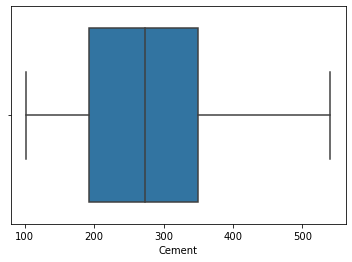

In [14]:
sns.boxplot(x="Cement",data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Ash')

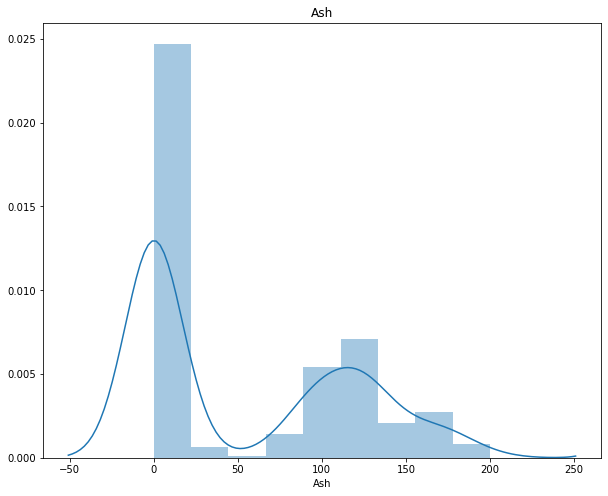

In [15]:
#Distplot
plt.figure(figsize=(10,8))
sns.distplot(df['Ash']).set_title("Ash")

In [16]:
sns.pairplot(df,diag_kind='kde')

<IPython.core.display.Javascript object>

Error in callback <function flush_figures at 0x000001EF259584C0> (for post_execute):


KeyboardInterrupt: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

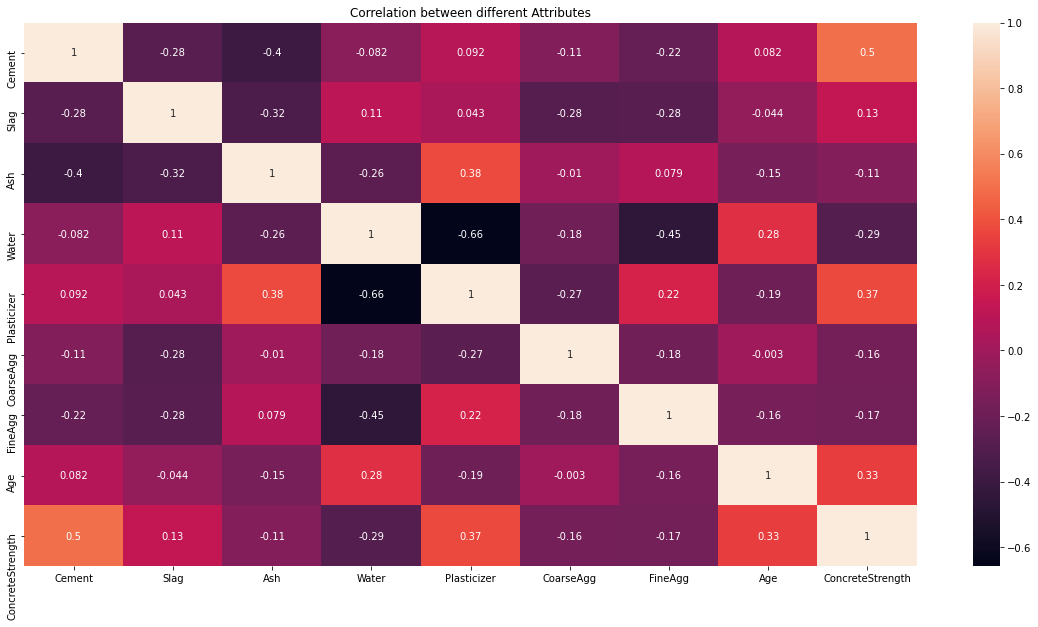

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between different Attributes")
plt.show()

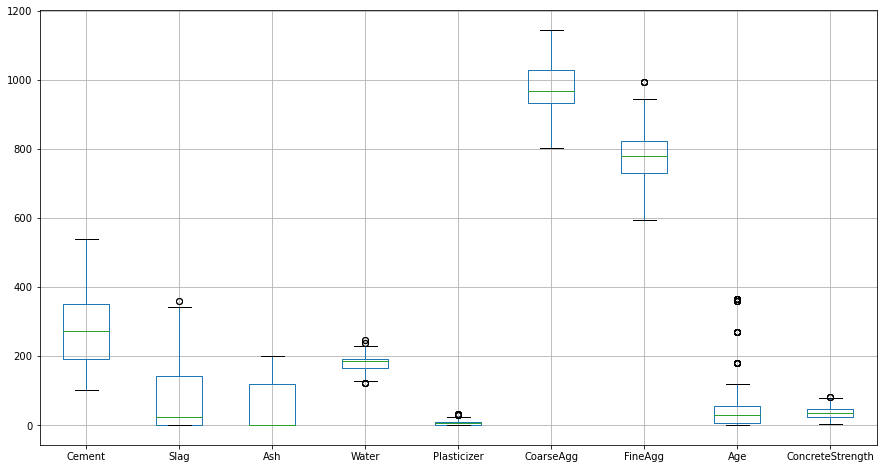

In [18]:
df.boxplot(figsize=(15,8))

In [19]:
for cols in df.columns[:-1]:
    Q1=df[cols].quantile(0.25)
    Q3=df[cols].quantile(0.75)
    iqr=Q3-Q1
    
    low=Q1-1.5*iqr
    high=Q3+1.5*iqr
    df.loc[(df[cols]<low) | (df[cols]>high), cols]=df[cols].mean()

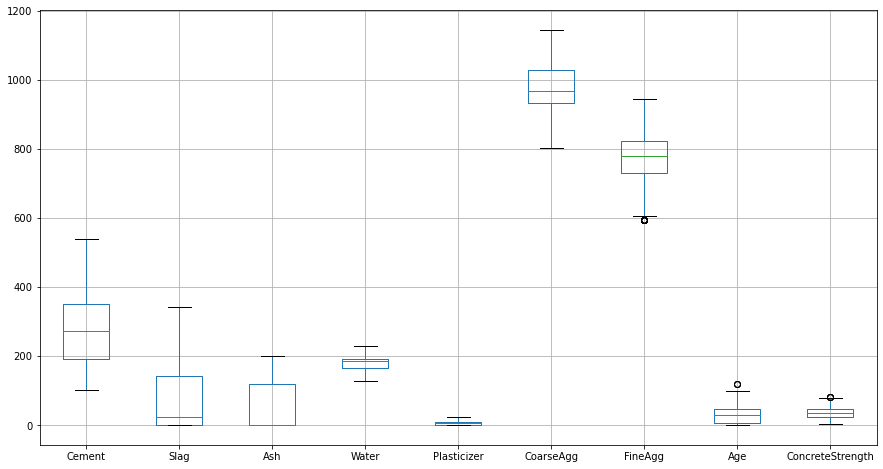

In [20]:
df.boxplot(figsize=(15,8))

In [21]:
#Featuire Engineering and Model Selection

In [22]:
#Splitting the data 
x=df.drop("ConcreteStrength",axis=1)
y=df["ConcreteStrength"]

In [23]:
from scipy.stats import zscore
xscaled=x.apply(zscore)
xscaled_df=pd.DataFrame(xscaled,columns=df.columns)

<IPython.core.display.Javascript object>

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [26]:
#Building Models

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [29]:
rfcpred=rfc.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score

In [31]:
#Model performance on training data
rfc.score(x_train,y_train)

0.9863199900641615

In [32]:
#Model performance on testing data
rfc.score(x_test,y_test)

0.8984900958152781

our model is overfitting

In [33]:
acc_R=r2_score(y_test,rfcpred)
acc_R

0.8984900958152781

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,rfcpred)

26.783376529249786

In [35]:
#store the accuracy results for each model in a dataframe for final comparison
results_1=pd.DataFrame({'Algorithm':['Random Forest'],'accuracy':acc_R},index={'1'})
results=results_1[["Algorithm","accuracy"]]
results

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.89849


In [36]:
from sklearn.model_selection import KFold,cross_val_score

In [37]:
#KFold cross validation
k=20

kfold=KFold(n_splits=k)
k_results=cross_val_score(rfc,x,y,cv=kfold)
accuracy=np.mean(abs(k_results))
accuracy

<IPython.core.display.Javascript object>

0.7937707728251289

In [38]:
random_re=pd.DataFrame({'Algorithm':['Random Forest Regressor kfold'],'accuracy':acc_R},index={'1'})
results=pd.concat([results,random_re])
results=results[["Algorithm","accuracy"]]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.89849
1,Random Forest Regressor kfold,0.89849


In [39]:
#Gradient Boosting regressor
model=GradientBoostingRegressor()
model.fit(x_train,y_train)

<IPython.core.display.Javascript object>

GradientBoostingRegressor()

In [40]:
y_pred=model.predict(x_test)

In [41]:
model.score(x_train,y_train)

0.9563755434733895

In [42]:
model.score(x_test,y_test)

0.9106084076927646

In [43]:
acc_G=r2_score(y_test,y_pred)
acc_G

0.9106084076927646

In [44]:
mean_squared_error(y_test,y_pred)

23.585961335920764

In [45]:
Gradient_re=pd.DataFrame({'Algorithm':['Gradient Boosting Regressor'],'accuracy':acc_G},index={'1'})
results=pd.concat([results,Gradient_re])
results=results[["Algorithm","accuracy"]]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.898490
1,Random Forest Regressor kfold,0.898490
1,Gradient Boosting Regressor,0.910608


In [46]:
k=20

kfold=KFold(n_splits=k)
k_results=cross_val_score(model,x,y,cv=kfold)
accuracy=np.mean(abs(k_results))
accuracy

<IPython.core.display.Javascript object>

0.7782632283674913

In [47]:
Gradient_re=pd.DataFrame({'Algorithm':['Gradient Boosting Regressor Kfold'],'accuracy':accuracy},index={'1'})
results=pd.concat([results,Gradient_re])
results=results[["Algorithm","accuracy"]]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.898490
1,Random Forest Regressor kfold,0.898490
1,Gradient Boosting Regressor,0.910608
1,Gradient Boosting Regressor Kfold,0.778263


Ada Boosting Regressor

In [48]:
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc_A=r2_score(y_test,y_pred)
acc_A


0.8143227569259617

In [49]:
mean_squared_error(y_test,y_pred)

48.99091920247808

In [50]:
AdaBoost_re=pd.DataFrame({'Algorithm':['AdaBoost regressor'],'accuracy':acc_A},index={'1'})
results=pd.concat([results,AdaBoost_re])
results=results[["Algorithm","accuracy"]]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.898490
1,Random Forest Regressor kfold,0.898490
1,Gradient Boosting Regressor,0.910608
1,Gradient Boosting Regressor Kfold,0.778263
1,AdaBoost regressor,0.814323


In [51]:
k=20

kfold=KFold(n_splits=k)
k_results=cross_val_score(model,x,y,cv=kfold)
accuracy=np.mean(abs(k_results))
accuracy

<IPython.core.display.Javascript object>

0.6001717690977917

In [52]:
from sklearn.neighbors import KNeighborsRegressor
diff_k=[]
for i in range(1,45):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    diff_k.append(np.mean(pred_i!=y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

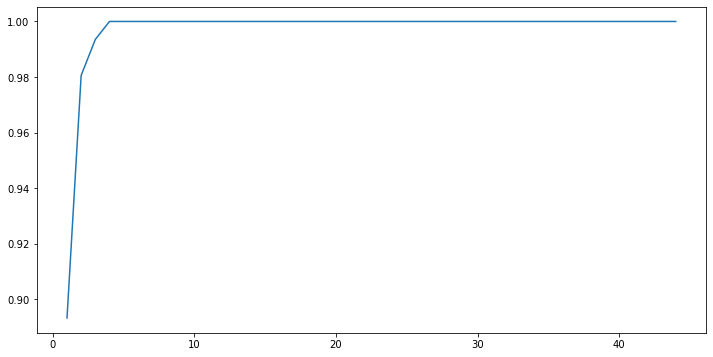

In [53]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k)

In [54]:
model=KNeighborsRegressor(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [55]:
y_pred=model.predict(x_test)

In [56]:
acc_KNN=r2_score(y_test,y_pred)
acc_KNN

0.7369439583617345

Support vector regressor

In [57]:
from sklearn.svm import SVR
model=SVR(kernel='linear')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [58]:
acc_SVR=r2_score(y_test,y_pred)
acc_SVR

0.7419218542069519

In [ ]:
k=20

kfold=KFold(n_splits=k)
k_results=cross_val_score(model,x,y,cv=kfold)
accuracy=np.mean(abs(k_results))
accuracy

Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_model=DecisionTreeRegressor()
dec_model.fit(x_train,y_train)

In [ ]:
print('Feature Importances:/n',pd.DataFrame(dec_model.feature_importances_,columns=['Importance'],index=x_train.columns))

In [ ]:
y_pred=dec_model.predict(x_test)

In [ ]:
dec_model.score(x_train,y_train)

In [ ]:
dec_model.score(x_test,y_test)

In [ ]:
acc_DT=r2_score(y_test,y_pred)
acc_DT

In [ ]:
mean_squared_error(y_test,y_pred)

In [ ]:
Decision_Tree=pd.DataFrame({'Algorithm':['Decision Tree'],'accuracy':acc_DT},index={'1'})
results=pd.concat([results,Decision_Tree])
results=results[["Algorithm","accuracy"]]
results

In [ ]:
k=18

kfold=KFold(n_splits=k)
k_results=cross_val_score(dec_model,x,y,cv=kfold)
accuracy=np.mean(abs(k_results))
accuracy

In [ ]:
results

In [ ]:
dec_prun_model=DecisionTreeRegressor(max_depth=4,random_state=1,min_samples_leaf=5)
dec_prun_model.fit(x_train,y_train)

In [ ]:
print('Feature Importances:/n',pd.DataFrame(dec_prun_model.feature_importances_,columns=['Importance'],index=x_train.columns))

In [ ]:
xscaled_df=xscaled_df.drop('ConcreteStrength',axis=1)
feature_cols=xscaled_df.columns

In [ ]:
! pip install graphviz

In [ ]:
!pip install pydot

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
import pydot

In [ ]:
dot_data=StringIO()
export_graphviz(dec_prun_model,out_file=dot_data,
               filled=True,rounded=True,
                special_characters=True,feature_names=feature_cols,class_names=['0','1'])
(graph,)=pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Concrete_pruned.png')
Image(graph.create_png())